In [8]:
# 이번에는 Pandas에 대해서 알아보아요!!
# Pandas는 ndarray(NumPy)를 기본 자료구조로 이용
# 이 ndarray를 가지고 Pandas는 두개의 또 다른 자료구조를 이용.
# Series, DataFrame

# Series : 동일한 데이터 타입의 복수개의 성분으로 구성되는 자료구조. (1차원)
# DataFrame : 엑셀에서 Table과 같은 개념. Database의 Table과 같은 개념
#             여러개의 Series로 구성되어 있어요! (2차원)
# pandas를 먼저 설치한 후 진행해야 해요!
# conda install pandas

import numpy as np
import pandas as pd

# ndarray
arr = np.array([-1, 4, 5, 99], dtype=np.float64)
# print(arr)

# pandas의 Series부터 만들어 보아요!
s = pd.Series([-1, 4, 5, 99], dtype=np.float64)
print(s)
print(s.values)  # [-1.  4.  5. 99.] ndarray
print(s.index)   # RangeIndex(start=0, stop=4, step=1)  
print(s.dtype)   # float64

0    -1.0
1     4.0
2     5.0
3    99.0
dtype: float64
[-1.  4.  5. 99.]
RangeIndex(start=0, stop=4, step=1)
float64


In [18]:
# Series 생성 시 index를 별도로 지정할 수 있어요! => list로 지정할 수 있어요!
# 숫자 index는 기본으로 사용이 가능!!

s = pd.Series([1, -8, 5, 10], 
              dtype=np.float64, 
              index=['c', 'b', 'a', 'k'])
# print(s)
# print(s[0])  # s[0]  => 1.0
# print(s['c'])  # s['c']  => 1.0

# 그러면 만약 index를 우리가 새로 지정해서 사용할 때 
# 같은 index가 있으면 어떻게 되나요??
# 안될거 같은데..실제로는 되요!!

s = pd.Series([1, -8, 5, 10], 
              dtype=np.float64, 
              index=['c', 'b', 'c', 'k'])
# print(s)
# print(s['c'])  # ??? 어떤걸 가져오나요??
               # 다 가져와요!! 그 결과는 Series로 리턴

# Series에서 slicing도 가능한가요??    
print(s[1:3])     # Series로 결과 return 
print(s['b':'k']) # 숫자인덱스로 slicing한 결과와 살짝 달라요!
                  # 문자인덱스로 slicing하면 숫자인덱스로 하는 경우와 달라요.. 

# Boolean Indexing    
print(s[s % 2 == 0])   # 짝수만 출력!!

# Fancy Indexing
print(s[[0,2,3]])

# NumPy에서 했던 여러가지 작업들이 그대로 사용될 수 있어요!!
print(s.sum())


b   -8.0
c    5.0
dtype: float64
b    -8.0
c     5.0
k    10.0
dtype: float64
b    -8.0
k    10.0
dtype: float64
c     1.0
c     5.0
k    10.0
dtype: float64
8.0


In [23]:
# Series 연습문제를 해결하면서 약간의 특성을 좀 더 알아보아요!!

# A공장의 2020-01-01부터 10일간 생산량을 Series로 저장할거예요!
# 생산량은 어떻게 결정되냐면 평균이 50이고 표준편차가 5인 정규분포에서 
# 랜덤하게 생성(정수로 처리)

# B공장의 2020-01-01부터 10일간 생산량을 Series로 저장해요!!
# 생산량은 평균이 70이고 표준편차가 8인 정규분포에서 추출

#        index   value 
# 예) 2020-01-01  53
#     2020-01-02  49
#         ...     ...

# Series를 만들어 보아요!!
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta

start_day = datetime(2020,1,1)

factory_A = pd.Series([int(x) for x in np.random.normal(50,5,(10,))],
                     index=[start_day + timedelta(days=x) for x in range(10)])
print(factory_A)

factory_B = pd.Series([int(x) for x in np.random.normal(70,8,(10,))],
                     index=[start_day + timedelta(days=x) for x in range(10)])
print(factory_B)

## 날짜별로 모든 공장의 생산량 합계를 구해보아요!
print('==============')
print(factory_A + factory_B)  # 사실은 index를 기준으로 같은 index끼리 더하는 거예요
## 아~~ 잘 더해지네~~

b_start_day = datetime(2020,1,5)

factory_B = pd.Series([int(x) for x in np.random.normal(70,8,(10,))],
                     index=[b_start_day + timedelta(days=x) for x in range(10)])
print(factory_B)


2020-01-01    47
2020-01-02    53
2020-01-03    54
2020-01-04    58
2020-01-05    41
2020-01-06    56
2020-01-07    48
2020-01-08    49
2020-01-09    58
2020-01-10    42
dtype: int64
2020-01-01    57
2020-01-02    75
2020-01-03    77
2020-01-04    61
2020-01-05    67
2020-01-06    61
2020-01-07    82
2020-01-08    73
2020-01-09    82
2020-01-10    65
dtype: int64
2020-01-01    104
2020-01-02    128
2020-01-03    131
2020-01-04    119
2020-01-05    108
2020-01-06    117
2020-01-07    130
2020-01-08    122
2020-01-09    140
2020-01-10    107
dtype: int64
2020-01-05    75
2020-01-06    67
2020-01-07    75
2020-01-08    63
2020-01-09    57
2020-01-10    66
2020-01-11    73
2020-01-12    59
2020-01-13    77
2020-01-14    66
dtype: int64


In [25]:
start_day = datetime(2020,1,1)

factory_A = pd.Series([int(x) for x in np.random.normal(50,5,(10,))],
                     index=[start_day + timedelta(days=x) for x in range(10)])
print(factory_A)


b_start_day = datetime(2020,1,5)

factory_B = pd.Series([int(x) for x in np.random.normal(70,8,(10,))],
                     index=[b_start_day + timedelta(days=x) for x in range(10)])
print(factory_B)

# 시작날짜가 달라요~ => index가 달라요!! 이런경우 어떻게 되나요??
print(factory_A + factory_B)



2020-01-01    45
2020-01-02    49
2020-01-03    47
2020-01-04    46
2020-01-05    60
2020-01-06    54
2020-01-07    44
2020-01-08    49
2020-01-09    55
2020-01-10    50
dtype: int64
2020-01-05    68
2020-01-06    59
2020-01-07    50
2020-01-08    71
2020-01-09    86
2020-01-10    75
2020-01-11    67
2020-01-12    71
2020-01-13    74
2020-01-14    68
dtype: int64
2020-01-01      NaN
2020-01-02      NaN
2020-01-03      NaN
2020-01-04      NaN
2020-01-05    128.0
2020-01-06    113.0
2020-01-07     94.0
2020-01-08    120.0
2020-01-09    141.0
2020-01-10    125.0
2020-01-11      NaN
2020-01-12      NaN
2020-01-13      NaN
2020-01-14      NaN
dtype: float64


In [29]:
s = pd.Series([1,2,3,4])
print(s)

# 새로운 데이터를 Series에 추가하려면??
# s[4] = 100
# print(s)

# s[6] = 200
# print(s)

# Series에서 특정 index를 삭제하려면??
s = s.drop(2)
print(s)

0    1
1    2
2    3
3    4
dtype: int64
0    1
1    2
3    4
dtype: int64


In [34]:
# python의 dictionary를 이용해서 Series를 만들 수 있어요!!
# dictionary의 key가 index가 되요!!

import numpy as np
import pandas as pd

my_dict = { '서울':1000, '부산':2000, '제주':3000 }

s = pd.Series(my_dict)
s.name = '지역별 가격 데이터!!'
s.index.name = '지역명'


print(s)



AttributeError: 'numpy.ndarray' object has no attribute 'name'

In [38]:
# pandas DataFrame 생성!!!
# python의 dictionary를 가지고 만들어요!!

# dictionary로 DataFrame을 생성할 때 데이터의 개수가 맞지 않으면 Error발생
# dictionary의 key가 DataFrame의 column으로 들어가게 됩니다.!!
# DataFrame은 Series의 집합으로 구성됩니다.!!(각각의 column이 Series)

import numpy as np
import pandas as pd

# dictionary
data = { 'names' : ['아이유', '김연아', '홍길동', '강감찬', '이순신'],
         'year' : [2015, 2019, 2020, 2013, 2017],
         'points' : [3.5, 1.5, 2.0, 3.4, 4.0] }

# DataFrame을 생성
df = pd.DataFrame(data)

# 출력을 해 보아요!! 출력할 때 print() 출력했어요!!
# DataFrame을 출력할때는 display()를 이용해서 출력하는게 좋아요!

display(df)

# 기억해야 하는 속성을 알아보아요!!
print(df.shape)  # tuple로 표현되구요!! (5,3)
print(df.size)   # 15
print(df.ndim)   # 2

,names,year,points
0,아이유,2015,3.5
1,김연아,2019,1.5
2,홍길동,2020,2.0
3,강감찬,2013,3.4
4,이순신,2017,4.0


(5, 3)
15
2


In [46]:
# DataFrame의 index, values, columns

import numpy as np
import pandas as pd

# dictionary
data = { 'names' : ['아이유', '김연아', '홍길동', '강감찬', '이순신'],
         'year' : [2015, 2019, 2020, 2013, 2017],
         'points' : [3.5, 1.5, 2.0, 3.4, 4.0] }

# DataFrame을 생성
df = pd.DataFrame(data)
display(df)

print(df.index)  # RangeIndex(start=0, stop=5, step=1)
print(df.columns) # Index(['names', 'year', 'points'], dtype='object')
print(df.values)  # 2차원 ndarray

df.index.name = '학번'
df.columns.name = '학생정보'

display(df)


,names,year,points
0,아이유,2015,3.5
1,김연아,2019,1.5
2,홍길동,2020,2.0
3,강감찬,2013,3.4
4,이순신,2017,4.0


RangeIndex(start=0, stop=5, step=1)
Index(['names', 'year', 'points'], dtype='object')
[['아이유' 2015 3.5]
 ['김연아' 2019 1.5]
 ['홍길동' 2020 2.0]
 ['강감찬' 2013 3.4]
 ['이순신' 2017 4.0]]


학생정보,names,year,points
학번,,,
0,아이유,2015,3.5
1,김연아,2019,1.5
2,홍길동,2020,2.0
3,강감찬,2013,3.4
4,이순신,2017,4.0


In [ ]:
### 기본적으로 python의 dictionary를 이용해서 DataFrame을 생성하는 방법

In [47]:
### DataFrame을 생성하는 다양한 방법 - 1. CSV파일을 이용해서 DataFrame을 생성

# CSV 파일을 하나 만들어서 DataFrame을 생성해 보아요!
# student.csv
# c:/notebook_dir/data/student.csv 생성해요!!(txt파일로 만들면 되요!)

import pandas as pd

df = pd.read_csv('./data/student.csv')

display(df)

,이름,입학연도,성적
0,아이유,2015,1.5
1,김연아,2016,2.0
2,홍길동,2019,3.0
3,강감찬,2020,3.7
4,이순신,2017,3.9


In [50]:
## 수행평가 문제 중 2번 문제는 movies.csv 파일을 읽어들여서 처리하는 거예요!!
## 영화번호, 영화제목, 장르
## 이 movies.csv 파일을 읽어들여서 DataFrame으로 만들어 보아요!!

import pandas as pd

df = pd.read_csv('./data/movies.csv')
# display(df)

# 처음부터 5개의 행만 출력하려면 어떻게 해야 하나요??
display(df.head())
# 끝부터 역방향으로 5개의 행만 출력하려면 어떻게 해야 하나요??
display(df.tail())
# pandas는 문자열 처리시 numpy보다 훨씬 효율적인 방법을 제공!!

# 가장많이 사용되는 CSV파일로부터 DataFrame을 생성하는 방법!!

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [5]:
### DataFrame을 생성하는 다양한 방법 - 2. Database를 이용해서 DataFrame을 생성

# 여러가지 DBMS 제품들이 있어요
# 데이터베이스??
# 데이터베이스는 일반적으로 정제된, 연관성이 있는 자료의 집합.
# 우리는 이런 데이터베이스를 활용하고 싶어요! CS분야에서는 데이터베이스가 파일에
# 저장되어 있어요!!
# 이런 데이터베이스를 다루기 위한 프로그램이 필요해요!
# 이런 프로그램들을 DBMS(DataBase Management System)라고 해요!
# Oracle, Cybase, DB2, Infomix, MySQL, SQLite, etc...
# MySQL을 가지고 데이터베이스를 구축한 후 이 데이터를 pandas의 DataFrame으로
# 가져올 꺼예요!!

# MySQL이라는 DBMS로 데이터베이스를 생성해서 데이터베이스를 구축해요!
# 그 안에 있는 데이터를 추출해서 DataFrame으로 생성!

# 사용할 MySQL버전은 5.6버전을 사용할 꺼예요!
# 추후에 프로젝트에서 Database에 쌓여있는 데이터를 가져다가 분석, 학습작업을 진행
# 해야 하는데 이때 데이터 정제하고 전처리하는데 pandas가 이용될 꺼예요!!

# 1. MySQL 5.6버전을 다운로드한 후 바탕화면에 압축을 풀어요!
# 2. mysqld를 실행해서 MySQL DMBS Server를 시작해요!!
# 3. MySQL Server를 실행시켰기 때문에 MySQL console에 들어갈 수 있어요!!
#                                     MySQL 시스템에 접속할 수 있어요!!
# 4. MySQL Server를 정상적으로 중지하려면 새로운 command창을 띄워요!
#    bin 폴더로 이동 => mysqladmin -u root shutdown
# 5. MySQL Server를 다시 기동시킨 후
# 6. MySQL 시스템에 접속해요! => command창을 열어서 다음의 명령을 입력해요!
#    => mysql -u root
#    => root 유저권한으로 mysql 시스템에 접속할꺼예요!!
# 7. 새로운 사용자를 생성해요!!
#    => create user data identified by "data";
# 8. 새로운 사용자를 하나 더 생성해야 합니다.
#    => create user data@localhost identified by "data";
# 9. 데이터베이스를 생성해야 해요!!
#    => create database library;
# 10. 생성한 데이터베이스(library)에 대한 사용권한을
#    새롭게 생성한 data 사용자에게 부여!!!
#    => grant all privileges on library.* to data;
#    생성한 사용자가 data@localhost도 있기때문에
#    => grant all privileges on library.* to data@localhost;
# 11. 지금까지 작업한 권한부여작업을 flush
#    => flush privileges;
# 12. 작업이 완료되었으니 console 을 종료!!
#    => exit;
# 13. 제공된 파일을 이용해서 실제 사용할 데이터베이스를 
#     구축해 보아요!!
# 14. 파일을 복사한 다음 다음의 명령어를 도스창에서 실행!!
#    => mysql -u data -p library < _BookTableDump.sql

# 데이터베이스 구축이 끝났으니.. pandas로 데이터베이스에
# 접속해서 데이터를 가져다가 DataFrame으로 만들어 보아요!
# 그런데 특별한 기능을 사용하고 있어요.
# python으로 MySQL database를 사용하는 기능을 하려고해요!
# 이 기능을 하기위한 package(module)이 필요해요!
# 이 module을 설치해야 해요! => pip install pymysql

import pymysql.cursors
import pandas as pd

# pymysql이라는 module을 이용해서 데이터베이스에 연결

conn = pymysql.connect(host='localhost',
                       user='data',
                       password='data',
                       db='library',
                       charset='utf8')

# 데이터베이스에 접속되면 SQL문을 실행시켜서 Database로부터
# 데이터를 가져온 후 이놈을 DataFrame으로 생성!!
sql = 'select btitle, bauthor, bprice from book'

df = pd.read_sql(sql, con=conn)

display(df)



,btitle,bauthor,bprice
0,C로 구현한 알고리즘,카일 루든(Kyle Loudon),25000
1,"IT EXPERT, 모바일 자바 프로그래밍","권기경, 박용우",23000
2,초보자를 위한 Linux & Unix C 프로그래밍,"김종훈, 김종진, 김동균",28000
3,스트럿츠 프레임워크 워크북,박재성,20000
4,나는 프로그래머다,임백준외 6명,12800
...,...,...,...
743,허리만 펴도 다이어트 : 날씬 체질로 바꿔주는 하루 1분 스트레칭,기즈 다다아키,10000
744,마사 스튜어트 미술놀이대백과 175,마사 스튜어트 리빙,18000
745,잘 자고 잘 먹는 아기의 시간표,정재호,13800
746,엄마는 약 선생 : 먹이고 바르고 붙이기 전에 꼭 봐야 할 아이 약 사용설명서,윤수진,13800


In [18]:
# 9월 10일 

# Database안에 Table을 사용하는 방법이 크게 2가지가 있어요 !
# 1. Django에서 사용했던 ORM방식( Model을 이용해서 Table을 사용하는 방법 )
#   => SQL이라고 하는 Database 언어를 몰라도 Table을 사용할 수 있어요 !
# 2. 일반적으로는 SQL 구문을 이용해서 Database안에 Table을 사용해요 ! 
#   => SQL구문을 알아야 .. table에서 내가 원하는 데이터를 추출할 수 있어요 !

import pymysql.cursors
import pandas as pd

# pymysql이라는 module을 이용해서 데이터베이스에 연결

conn = pymysql.connect(host='localhost',
                       user='data',
                       password='data',
                       db='library',
                       charset='utf8')

# 데이터베이스에 접속되면 SQL문을 실행시켜서 Database로부터
# 데이터를 가져온 후 이놈을 DataFrame으로 생성!!
# sql = 'select btitle, bauthor, bprice from book'
# SQL은 대,소문자 구분 x
# sql = 'select btitle, bprice from book'
# select 컬럼 from 테이블 명
# 조건을 주려면
# sql = 'select btitle, bauthor, bprice from book where bprice > 30000'
# 책 제목에 특정 키워드가 들어가 있는 책들만 골라오고 싶어요 !
# like "% %" => 와일드카드 사용해서 검색하면 키워드 검색 가능

sql = 'select btitle, bprice from book where btitle like "%java%"'
df = pd.read_sql(sql, con=conn)

display(df)

,btitle,bprice
0,Head First Java: 뇌 회로를 자극하는 자바 학습법(개정판),28000
1,뇌를 자극하는 Java 프로그래밍,27000
2,모던 웹을 위한 JavaScript + jQuery 입문(개정판) : 자바스크립트에...,32000
3,"JavaScript+jQuery 정복 : 보고, 이해하고, 바로 쓰는 자바스크립트 공략집",28000
4,이것이 자바다 : 신용권의 Java 프로그래밍 정복,30000
5,Head First JavaScript Programming : 게임과 퍼즐로 배우...,36000
6,Head First JavaScript : 대화형 웹 애플리케이션의 시작,28000
7,UML과 JAVA로 배우는 객체지향 CBD 실전 프로젝트 : 도서 관리 시스템,40000
8,"IT CookBook, 웹 프로그래밍 입문 : XHTML, CSS2, JavaScript",23000
9,자바스크립트 성능 최적화: High Performance JavaScript,20000


In [27]:
# 이렇게 Database나 CSV파일로부터 데이터를 읽어들여서 DataFrame으로 만들었어요 !
# 이렇게 만든 DataFrame을 JSON으로 저장할 수 있어요 ! 
# JSON 파일로 저장 할 떄 4가지 방식이 있어요 !

# Database 안의 book table에서 원하는 내용의 데이터를 가져온 후 DataFrame으로
# 만들어서 이 DataFrame을 JSON 파일로 저장해 보아요 !

import pymysql.cursors
import pandas as pd


conn = pymysql.connect(host='localhost',
                       user='data',
                       password='data',
                       db='library',
                       charset='utf8')

sql = 'select btitle,bauthor,bprice from book where btitle like "%여행%"'
df = pd.read_sql(sql, con=conn)

display(df)

# DataFrame을 json 파일로 저장할 떄 총 4가지 서로 다른 형식이 존재
# unicode로 파일을 생성한 후 데이터를 저장해야 한글이 정상 처리가 되요 
# 파일을 저장할 폴더는 미리 생성이 되어 있어야 합니다 !

# with : 일반적으로 파일 처리를 할 떄 순서는 파일열기 - 내용쓰기 - 파일닫기 이순서 
#         with 구문을 이용하면 resource의 close처리(해제처리)가 자동으로 이루어져요
with open('/Users/mac/notebook_dir/data/json/books_columns.json','w',
          encoding='utf8') as file:
    df.to_json(file, force_ascii=False, orient='columns')
# orient = columns로 설정하면 df의 column이 json의 key값으로 들어간다.

with open('/Users/mac/notebook_dir/data/json/books_records.json','w',
          encoding='utf8') as file:
    df.to_json(file, force_ascii=False, orient='records')
    
with open('/Users/mac/notebook_dir/data/json/books_index.json','w',
          encoding='utf8') as file:
    df.to_json(file, force_ascii=False, orient='index')
    
with open('/Users/mac/notebook_dir/data/json/books_values.json','w',
          encoding='utf8') as file:
    df.to_json(file, force_ascii=False, orient='values')

,btitle,bauthor,bprice
0,"IT CookBook, C++ 하이킹 : 객체지향과 만나는 여행","성윤정, 김태은",25000
1,게스트하우스 창업 A to Z : 청춘여행자의 낭만적 밥벌이,김아람,15000
2,크로아티아의 작은 마을을 여행하다 : 자다르의 일몰부터 두브로브니크의 붉은 성벽까지,양미석,15800
3,도쿄의 오래된 상점을 여행하다 : 소세키의 당고집부터 백 년 된 여관까지,"여지영, 이진숙",15000


In [35]:
# Json 파일을 읽어서 DataFrame을 생성해 보아요 

import numpy as np
import pandas as pd
import json

# 우리가 가지고 있는 json 파일을 open해서 json내용을 읽어들어야 해요 ! 

with open('./data/json/books_columns.json','r', encoding='utf-8') as file :
    dict_books = json.load(file) # json 데이터를 python의 dict로 저장
    
print(dict_books)
print(type(dict_books)) # python의 dict

df = pd.DataFrame(dict_books)

display(df)

{'btitle': {'0': 'IT CookBook, C++ 하이킹 : 객체지향과 만나는 여행', '1': '게스트하우스 창업 A to Z : 청춘여행자의 낭만적 밥벌이', '2': '크로아티아의 작은 마을을 여행하다 : 자다르의 일몰부터 두브로브니크의 붉은 성벽까지', '3': '도쿄의 오래된 상점을 여행하다 : 소세키의 당고집부터 백 년 된 여관까지'}, 'bauthor': {'0': '성윤정, 김태은', '1': '김아람', '2': '양미석', '3': '여지영, 이진숙'}, 'bprice': {'0': 25000, '1': 15000, '2': 15800, '3': 15000}}
<class 'dict'>


,btitle,bauthor,bprice
0,"IT CookBook, C++ 하이킹 : 객체지향과 만나는 여행","성윤정, 김태은",25000
1,게스트하우스 창업 A to Z : 청춘여행자의 낭만적 밥벌이,김아람,15000
2,크로아티아의 작은 마을을 여행하다 : 자다르의 일몰부터 두브로브니크의 붉은 성벽까지,양미석,15800
3,도쿄의 오래된 상점을 여행하다 : 소세키의 당고집부터 백 년 된 여관까지,"여지영, 이진숙",15000


In [71]:
 # DataFrame을 생성하는 다양한 방법 - 3. Open Api를 이용해서 DataFrame을 생성

# 일일 박스 오피스 순위를 알려주는 영화진흥위원회 open api를 이용해서 json을 받아온 후
# 이 json을 DataFrame으로 만들어주면 될 듯 싶어요

# network연결을 통해서 open api를 호출해요 !

import numpy as np
import pandas as pd
import json
import urllib

# 우리가 호출할 open api url이 있어야 해요 !
# 영화 진흥 위원회 open api가면 이 내용이 있죠 !
key = ''
targetDt='20200901'
openapi_url ="http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=430156241533f1d058c603178cc3ca0e&targetDt=20200909"
load_page = urllib.request.urlopen(openapi_url) # request를 보냈으니 response가 와요
# load_page => response 객체

json_page = json.loads(load_page.read())['boxOfficeResult']['dailyBoxOfficeList'] # dictionary 추출
# df = pd.DataFrame(json_page)
# display(df)


movie_df = pd.DataFrame(json_page)
display(movie_df)

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20201122,테넷,2020-08-26,238756700,45.6,-15953060,-6.3,10462125430,26692,-1863,-6.5,1145039,1384,3738
1,2,2,0,OLD,20193666,오! 문희,2020-09-02,82449330,15.7,-16790170,-16.9,1341921180,10167,-1897,-15.7,169748,824,2388
2,3,3,0,NEW,20201687,기기괴괴 성형수,2020-09-09,64790700,12.4,64790700,100,67517700,7867,7867,100,8170,254,887
3,4,4,0,NEW,20202203,에이바,2020-09-09,52480830,10.0,52480830,100,52480830,7160,7160,100,7160,515,1258
4,5,5,-2,OLD,20197922,다만 악에서 구하소서,2020-08-05,31297070,6.0,-7483620,-19.3,38336555150,3744,-898,-19.3,4326073,469,882
5,6,6,0,OLD,20183813,결백,2020-06-10,11567000,2.2,3907000,51,7661786340,1500,500,50,868353,13,14
6,7,7,0,NEW,20203237,아무도 없다,2020-09-09,8029550,1.5,8029550,100,8029550,959,959,100,959,122,223
7,8,8,-4,OLD,20199883,오케이 마담,2020-08-12,6996670,1.3,-3138070,-31,10939240110,851,-481,-36.1,1222950,186,247
8,9,9,-4,OLD,20202281,극장판 짱구는 못말려: 신혼여행 허리케인~ 사라진 아빠!,2020-08-20,4639070,0.9,-4008670,-46.4,905375500,612,-507,-45.3,111357,123,135
9,10,10,-3,OLD,20112692,드라이브,2011-11-17,4687970,0.9,-2259890,-32.5,222262680,536,-287,-34.9,27865,73,100


In [7]:
import numpy as np
import pandas as pd
import json
import urllib

# 우리가 호출할 open api url이 있어야 해요 !
# 영화 진흥 위원회 open api가면 이 내용이 있죠 !
targetDt='20200901'
openapi_url ="http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=430156241533f1d058c603178cc3ca0e&targetDt=20200909"
load_page = urllib.request.urlopen(openapi_url) # request를 보냈으니 response가 와요
# load_page => response 객체

json_page = json.loads(load_page.read())# dictionary 추출
# df = pd.DataFrame(json_page)
# display(df)
movie_data = dict()
rank_list = list()
title_list = list()
sales_list = list()

for tmp in json_page['boxOfficeResult']['dailyBoxOfficeList']:
    rank_list.append(tmp['rank'])
    title_list.append(tmp['movieNm'])
    sales_list.append(tmp['salesAmt'])
    
movie_data['영화제목'] = title_list
movie_data['총 매출액'] = sales_list
df=pd.DataFrame(movie_data)
df.index = rank_list
display(df)


,영화제목,총 매출액
1,테넷,238756700
2,오! 문희,82449330
3,기기괴괴 성형수,64790700
4,에이바,52480830
5,다만 악에서 구하소서,31297070
6,결백,11567000
7,아무도 없다,8029550
8,오케이 마담,6996670
9,극장판 짱구는 못말려: 신혼여행 허리케인~ 사라진 아빠!,4639070
10,드라이브,4687970


In [19]:
# pandas의 DataFrame을 이런 방식으로 만들 수 있어요 !

# DataFrame에 대해서 조금만 더 알아보아요 !

import numpy as np
import pandas as pd

# dictionary을 하나 만들어요
data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과' : ['컴퓨터학과','기계','철학과','컴퓨터학과','국어국문'],
       '학년' : [1,2,3,2,4],
       '학점' : [1.5, 1.3, 1.5, 1.5, 1.7]}

# columns의 순서 변경 가능
df = pd.DataFrame(data,
                 columns = ['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# DataFrame은 기본 분석 함수를 제공해줘요
# 기본 분석 함수 => count, 평균, 표준편차, 최대, 최소 , 사분위

#df.describe() # DataFrame 안에 있는 순자연산이 가능한 column에 한해서
              # 기본분석함수를 적용해서 수치값들을 DataFrame으로 리턴
    
display(df.describe())

# DataFrame 생성에 대한 이야기 !!

,학과,이름,학점,학년,등급
one,컴퓨터학과,이지은,1.5,1,NaN
two,기계,박동훈,1.3,2,NaN
three,철학과,홍길동,1.5,3,NaN
four,컴퓨터학과,강감찬,1.5,2,NaN
five,국어국문,오해영,1.7,4,NaN


,학점,학년
count,5.000000,5.000000
mean,1.500000,2.400000
std,0.141421,1.140175
min,1.300000,1.000000
25%,1.500000,2.000000
50%,1.500000,2.000000
75%,1.500000,3.000000
max,1.700000,4.000000


In [29]:
# DataFrame의 indexing

# 1. 일단 우리 column에 대해서 알아보아요 ! (column을 추출하는 방법)

# DataFrame에서 특정 column을 추출할 수 있습니다.
# 만약 하나의 column을 DataFrame에서 추출하면 그 결과는 Series가 되요

import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,3,4,5],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

## column을 추출하고 싶어요 !
print(df['이름'])   # 결과는 Series로 return
# print(df.'이름')
# print(df.이름) # 많이 사용되지는 않은 , 프로그래밍에 적합한 형태가 아님

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,3,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,5,NaN


one      이지은
two      박동훈
three    홍길동
four     강감찬
five     오해영
Name: 이름, dtype: object


In [37]:
# 이렇게 column을 추출한 후 데이터를 변경해 보아요 !

import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

year=df['학년'].copy() # year는 Series가 되요 = > view!!!
year['one']=100 # Series의 내용을 변경하러게요
print(year)
display(df)

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


one      100
two        2
three      2
four       4
five       3
Name: 학년, dtype: int64


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


In [43]:
# DataFrame에서 두 개 이상의 columns을 추출하려면 어떻게 해야 하나요?
# Fancy indexing
# 두 개 이상의 column을 추출하면 DataFrame으로 리턴되요 !
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# display(df['학과','학점']) # Error ( 문법 자체가 틀렸어요 )
#display(df['학과':'학점']) # Error ( slicing을 적용할 수 없어요 ! )
display(df[['학과','학점']])

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,학점
one,컴퓨터,1.5
two,기계,2.0
three,철학,3.1
four,컴퓨터,1.1
five,철학,2.7


In [49]:
# DataFrame에서 특정 column의 값을 수정하려고 해요 !
# 단일 값 , numpy array, list를 이용해서 수정할 수 있어요 !

import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# df['등급'] = "A"
# df['등급'] = ['A','B',"A",'D','F']
df['등급'] = np.array(['A','B',"A",'D','F'])
display(df)


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,A
two,기계,박동훈,2.0,2,B
three,철학,홍길동,3.1,2,A
four,컴퓨터,강감찬,1.1,4,D
five,철학,오해영,2.7,3,F


In [56]:
# DataFrame에서 두개 이상의 특정 colunm 값을 수정
# 단일값, ndarray, list를 이용해서 수정 ! 
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# df[['학과','등급']] ='A'
df[['학과','등급']] = [['영어영문','A'],
                    ['철학','C'],
                    ['국어국문',"B"],
                    ['물리','C'],
                    ['화학',"F"]]
display(df)


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학점,학년,등급
one,영어영문,이지은,1.5,1,A
two,철학,박동훈,2.0,2,C
three,국어국문,홍길동,3.1,2,B
four,물리,강감찬,1.1,4,C
five,화학,오해영,2.7,3,F


In [66]:
# 새로운 column을 DataFrame에 추가하려면 어떻게 해야 하나요?
# scalar, ndarray, list, series 를 이용해서 추가할 수 있어요 !

import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# 현재 DataFrame에 '나이'라는 column을 추가하고 싶어요 !
# df['나이'] = [20,21,22,34,21] # column을 추가할 수 있다 
# df['나이'] = [20,21,22] # 개수가 안맞으면 추가가 안됨
# df['나이'] = pd.Series([20,21,22,23,24]) # ??? 추가가 안됨
                                        # Series로 column을 추가할 때는 값의 대입 기준이 
                                        # index
# Series로 새로운 column을 추가할 때는 index를 매칭 시켜야지 
# 값이 정상적으로 들어가요 !
# list를 쓰고 말지 series사용이 더 불편하네 !! 라고 생각할 수 있음
# 그렇지 않다 . 왜냐하면 .. 
# 다양한 수의 데이터를 추가할 수 있어요 ! . index 기반으로 데이터가 추가되기 때문에 
# 개수를 맞추어 주지 않아도 들어간다
# df['나이'] = pd.Series([20,21,22,23,24],index = df.index)
df['나이'] = pd.Series([20,21,22],
                    index = ['one','two','five'])
display(df)

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학점,학년,등급,나이
one,컴퓨터,이지은,1.5,1,NaN,20.0
two,기계,박동훈,2.0,2,NaN,21.0
three,철학,홍길동,3.1,2,NaN,NaN
four,컴퓨터,강감찬,1.1,4,NaN,NaN
five,철학,오해영,2.7,3,NaN,22.0


In [68]:
# 새로운 column을 column의 연산을 통해서 추가할 수 있어요 !
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# 마지막에 column을 하나 추가해요 !! '장학생 여부 '라는 column이고
# 만약 학점이 3.0 이상이면 True, 그렇지 않으면 False라고 세팅하세요
df['장학생여부'] = df['학점'] > 3.0

display(df)

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학점,학년,등급,장학생여부
one,컴퓨터,이지은,1.5,1,NaN,False
two,기계,박동훈,2.0,2,NaN,False
three,철학,홍길동,3.1,2,NaN,True
four,컴퓨터,강감찬,1.1,4,NaN,False
five,철학,오해영,2.7,3,NaN,False


In [21]:
# DataFrame에서 column을 삭제
# 함수를 이용해서 column을 삭제할 수 있어요 !
# 함수 사용에 주의해야 해요 !
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# 열(column)을 삭제할 경우, 행(row)을 삭제할 경우 둘 다 drop()을 사용 !!
# inplace = True 이면 원본을 지워요 !
# inplace = False 이면 원본은 보존하고 삭제된 결과 df를 만들어서 return
#           default값은 inplace = False
# new_df = df.drop('학년', axis = 1, inplace=False)

# display(new_df)
new_df = df.drop(['학점','등급'], axis = 1, inplace=False)

display(new_df)



,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학년
one,컴퓨터,이지은,1
two,기계,박동훈,2
three,철학,홍길동,2
four,컴퓨터,강감찬,4
five,철학,오해영,3


In [23]:
# 지금부터는 row indexing에 대해서 알아보아요 !

import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# column indexing 
# 단일 column을 indexing
# print(df['이름'])  # ok
# print(df['학과': '학점'])   # X 안됨 . column에 대해서 slicing을 지원하지 않는다
# display(df[['학과','이름']])  # ok, colums에 대해서 Fancy indexing은 가능

# row indexing - part 1 ( 행에 대한 숫자 index를 이용하는 방법 )


# print(df[0]) # Error , row 에 대해서 숫자 index로 단일 indexing이 안되요
# display(df[1:3]) # ok. slicing이 가능 - sclicing한 결과는 View, DataFrame으로 return
# display(df[1:]) # OK
#display(df[[0,2]]) # Error, row에 대해서 index 숫자를 이용한 fancy indexing은 안되요 !

# row indexing - part 2 ( 행에 대한 별도의 index를 이용하는 방법 )

# df['one'] # error
# display(df['one':'three'])   # Ok, index를 이용한 row slicing이 가능
# display(df['three':]) # OK
# display(df['three':-1]) # Error , 숫자 index와 index를 혼용해서 슬라이싱 할 수 없어요 !
# display(df[['two','four']]) # Error, Fancy indexing이 안되요

# row indexing - part 3 ( loc[]를 row indexing. 가장 많이 사용하는 방법 중 하나 )
                      #   loc를 이용할 떄는 숫자 index가 아닌 부여한 index를 이용
# df['one']
# print(df.loc['one']) # ok! , loc와 index를 이용하면 단일 row를 추출할 수 있어요 !
                     # Series로 return
# display(df.loc['one':'three'])
# display(df.loc['three':]) # slicing 가능
# display(df.loc['one':-1]) # error, 여전히 불가능
# display(df.loc[['one','three']]) # Fancy indexing 가능
# print(df.loc[0]) # error , 숫자 indexing 사용이 불가능

# row indexing - part 4 (iloc[]를 row indexing, 많이 사용하는 방법 중 하나. )
                        # loc[]와 다른 점은 .. iloc[] 무조건 숫자 index만 사용할 수 있어요
# df.iloc[0]


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


In [34]:
# loc[]를 이용해서 DataFrame의 행을 추출할 수 있어요 !
# loc[]를 이용하면 행과 열을 동시에 추출할 수 있어요 !
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)


# 행을 추출해 보아요!
# display(df.loc['one':'three'])
# 행 뿐만 아니라 열도 같이 추출할 수 있어요 !

# display(df.loc['one':'three','이름']) # Series

# display(df.loc['one':'three','이름':'학년']) # DataFrame
# display(df.loc['one':'three',['이름','학년']]) # column로 지정 가능 !


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


In [180]:
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# 학점이 1.5점을 초과하는 학생의 이름과 학점을 DataFrame을 출력
# 작성해보세요 

result = df['학점'] > 1.5 # boolean mask 생성
display(df.loc[result,['이름','학점']])

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,이름,학점
two,박동훈,2.0
three,홍길동,3.1
five,오해영,2.7


In [56]:
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)


# 1. 이름이 박동훈인 사람을 찾아서 이름과 학점을 DataFrame로 출력하세요 !
result = df['이름'] == '박동훈'
df.loc[result,['이름','학점']]



,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,이름,학점
two,박동훈,2.0


In [179]:
# 2. 학점이 1.5 초과이고 2.5 미만인 모든 사람을 찾아서 학과, 이름, 학점을 
#    DataFrame으로 출력하세요 ! 
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

result = (df['학점'] > 1.5) & (df['학점'] < 2.5)
df.loc[result,'학과':'학점']


# and연산 불가능, numpy array로 Series이기 때문에 사용이 안된다. 

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학점
two,기계,박동훈,2.0


In [86]:
# 3. 학점이 3.0 을 초과하는 사람을 찾아서 등급을 A로 설정
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

result = df['학점'] > 3.0

df.loc[result,'등급'] = 'A'
display(df)

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,A
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


In [178]:
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# iloc를 이용한 행과 열의 indexing 
# 숫자 index를 이용해서 처리할 때는 iloc[]를 이용하면 되요 !
#print(df.iloc[0,0]) # 컴퓨터
#print(df.iloc[1]) # Series
# print(df.iloc[1:4])
df.iloc[[0,2],[1,3]] # numpy에서는 행과열을 동시에 fancy indexing이 안되요
                     # np.ix_() 함수를 이용해서 numpy에서는 사용
                     # DataFrame에서는 iloc[] 이용한 행과 열의 facny 
                     # indexing이 동시에 사용 될 수 있다 !



,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,이름,학년
one,이지은,1
three,홍길동,2


In [101]:
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# Dataframe에서 새로운 행을 추가하기 위해서 어떻게 해야 할까요?

# df.loc['six',:] =['영어영문','최길동',4.0, 3, 'A']

df.loc['six',['학과','이름']] =['영어영문','최길동']
display(df)


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1.0,NaN
two,기계,박동훈,2.0,2.0,NaN
three,철학,홍길동,3.1,2.0,NaN
four,컴퓨터,강감찬,1.1,4.0,NaN
five,철학,오해영,2.7,3.0,NaN
six,영어영문,최길동,NaN,NaN,NaN


In [106]:
import numpy as np
import pandas as pd

data = {'이름' : ['이지은','박동훈','홍길동','강감찬','오해영'],
       '학과': ['컴퓨터','기계','철학','컴퓨터','철학'],
       '학년': [1,2,2,4,3],
       '학점':[1.5, 2.0, 3.1, 1.1, 2.7]}
df = pd.DataFrame(data, 
                 columns=['학과','이름','학점','학년','등급'],
                 index = ['one','two','three','four','five'])
display(df)

# DataFrame에서 특정 컬럼을 삭제해 보아요 !
display(df.drop('학점', axis=1, inplace=False))

# DataFrame에서 특정 행을 삭제해 보아요 !
display(df.drop('three', axis=0, inplace=False))

# DataFrame에서 특정 2개행을 삭제해 보아요 !
display(df.drop(['three','five'], axis=0, inplace=False))

,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
three,철학,홍길동,3.1,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학년,등급
one,컴퓨터,이지은,1,NaN
two,기계,박동훈,2,NaN
three,철학,홍길동,2,NaN
four,컴퓨터,강감찬,4,NaN
five,철학,오해영,3,NaN


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN
five,철학,오해영,2.7,3,NaN


,학과,이름,학점,학년,등급
one,컴퓨터,이지은,1.5,1,NaN
two,기계,박동훈,2.0,2,NaN
four,컴퓨터,강감찬,1.1,4,NaN


In [123]:
# DataFrame이 제공하는 함수들 ( 집계함수, 통계기반 함수 .. )

# 기댓값(expected value) : 어떤 확률을 가진 사건을 무한히 반복했을 경우
                    #    얻을 수 있는 값의 평균으로 기대할 수 있는 값.
    
# 주사위 1개를 던지는 사건을 무한히 반복 했을 때 기댓값은 얼마인가요?

import numpy as np
import pandas as pd

result = np.random.randint(1,7,(1000000,))
print(result.mean())

3.497155


[4 6 1 3 8 8]
30
5.0
6.666666666666667
2.581988897471611


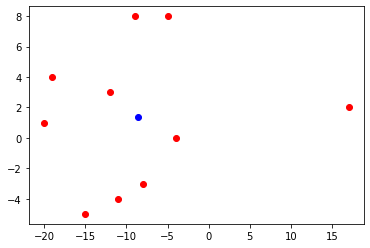

In [136]:
# 편차 ( deviation ) : 확률변수 x와 평균(기댓값)의 차이 ! 
# 국민개개인의 소득 .. 홍길동 . 김길동 . 아이유 , 김연아 , 놀부 ...
# 국민 평균 소득을 산출 
# 홍길동소득 - 평균, 김길동소득 - 평균, 아이유소득 - 평균, 김연아소득 - 평균, 놀부소득 - 평균 
# 편차의 관점에서 보면 양극화가 심하다 !
# 편차를 이용하며 데이터의 흩어진 정도를 알기 쉬워요 !!

# 편차의 가장 큰 단점..
# 편차의 합은 0
# 데이터의 흩어진 정도를 하나의 숫자로 표현하기 힘들어요 

# 분산(variance) : 데이터의 흩어진 정도를 알기위해서 사용하는
#                 편차의 제곱의 평균 ( 얼마나 데이터가 흩어져 있느냐  ,, )
#                 제곱을 이용했기 때문에 실제로 사용하기가 애매

# std( standard deviation ) : 표준편차 !! => 분산의 제곱근

import numpy as np

arr = np.array([4,6,1,3,8,8], dtype = np.int32)
print(arr)
print(arr.sum()) # 30 # 합
print(arr.mean()) # 5.0 # 평균
print(arr.var()) # 6.66666.. # 분산
print(arr.std()) # 2.581988897471611 # 표준편차

######################################

# 공분산( covariance )
# 두 개의 확률변수의 관계를 보여줄 떄 사용하는 값
# 공분산은 두 확률변수의 편차의 곱에 대한 평균
# 확률변수 x(독립변수)와 y(종속변수)에 대해 x가 변할 때 y가 변하는 정도.
# 두개가 같이 움직임. x 가 증가하면 y도 증가

# 그래프를 이용해서 공분산의 의미를 파악해보아요 !

import numpy as np
import matplotlib.pyplot as plt

# 독립변수 x에 대해 종속변수 y의 값을 랜덤으로 생성해서 알아보아요!
np.random.seed(1)
x = np.random.randint(-20,20,(10,))
y = np.random.randint(-10,10,(10,))

x_mean = x.mean()  # x의 평균
y_mean = y.mean()  # y의 평균

# 이렇게 구한 값을 가지고 . . scatter(산점도)
plt.scatter(x,y,color = 'red')
plt.scatter(x_mean, y_mean, color ='blue')

plt.show()

# 공분산은 데이터의 변화량에 대한 총합을 의미
# 공분산이 양수인지 , 음수인지에 따라서 데이터의 방향성을 알 수 있어요 
# 공분산의 단점 = > 단위의 문제 때문에 연관성은 알 수 있는데 그 강도는 알수 없다.

# 만약 확률변수 x와 y가 독립이면 공분산을 계산하면 0에 수렴 ( 연관성이 없다 .)
# 역은 성립하지 않는다. 공분산이 0이면 두 확률변수는 독립이에요 . 라고 할수없다.



In [145]:

import numpy as np
import matplotlib.pyplot as plt

# 독립변수 x에 대해 종속변수 y의 값을 랜덤으로 생성해서 알아보아요!
np.random.seed(2)
sampleNum = 100 # 데이터의 개수

x = np.random.randint(0,10,(sampleNum,))
y = np.random.randint(-20,20,(sampleNum,))

x_mean = x.mean()  # x의 평균
y_mean = y.mean()  # y의 평균


## 간단하게 공분산을 계산해 보아요 !

# 공분산은 편차의 곱의 평균 !!

x_deviation = x - x_mean  # x 편차
y_deviation = x - y_mean  # y 편차

result =0
for tmp in range(sampleNum):
    result += (x_deviation[tmp] * y_deviation[tmp])

result_covariance = result / (sampleNum-1) # 표준 공분산.
print(result_covariance)

print(np.cov(x,y))

7.527676767676769
[[  7.52767677  -0.59151515]
 [ -0.59151515 123.99636364]]


In [160]:
# 공분산에 대해서 알아보았으니 .. 우리 간단한 예제를 통해서
# 진짜 그러한지를 알아보아요
# 주가를 이용해서 공분산이 정말로 양수 , 음수의 의미가 배운 내용과 일치하는지
# 확인을 해 보아요 !
# KOSPI 200 ( 대형회사 200개의 주가로 만든 또 다른 지수 . )
# KOSPI 200안에서 삼성전자 비중이 34% 정도 되요 .
# 삼성전자가 오르면 KOSPI가 올라요 !
# 삼성전자가 떨어지면 KOSPI가 떨어져요 !

import numpy as np
import pandas as pd
import pandas_datareader.data as pdr # 주가 데이터를 받기위해서 필요 !
from datetime import datetime        # 날짜 객체를 만들기 위해서 .

# 특정 날짜 간격동안 주식데이터를 받아올꺼에요 !
# 특정 날짜 간격을 정해야 하는데 datetime을 이용해서 시작날짜와 끝 날짜를 지정.

start = datetime(2018,1,1) # 2019년 1월 1일
end = datetime(2018,12,31)

# Yahoo에서 제공하는 주가지수를 얻어와요 !
df_KOSPI = pdr.DataReader('^KS11','yahoo', start, end) # KOSPI
df_SE = pdr.DataReader('005930.KS','yahoo',start,end) # 삼성전자
#display(df_KOSPI.head()) # 종가를 알아와야 해요 ! 'Close' colunm을 이용

# 반대로 움직이는 주식 데이터를 가져와서 공분산이 음수가 되는지를 확인 !
# 남북경협주, 방위산업주
df_LIG = pdr.DataReader('079550.KS','yahoo', start, end) # LIG넥스원(방위)
df_PUSAN = pdr.DataReader('011390.KS','yahoo',start,end) # 부산산업(남북경협주)

closed_LIG = df_LIG['Close'] #           Series
closed_PUSAN = df_PUSAN['Close']       # Series

# 공분산을 구해보아요
# print(np.cov(closed_KOSPI.values, closed_SE.values)) # 양수 !!
print(np.cov(closed_LIG.values, closed_PUSAN.values)) # 양수 !!

# 1,3 분면(삼성전자와, 코스피)을 봐야함. 4분면은 삼성전자와 자기 자신
# 이 값이 양수에요 ! 하나가 증가하면 같이 증가 , 양의 관계에 있다
# 공분산으로는 두 데이터의 관계가 얼마나 강한지 알 수 없어요

[[ 6.24988174e+07 -3.81494283e+08]
 [-3.81494283e+08  4.64412566e+09]]


In [162]:
#  공분산이 많이 사용되나요??
#  공분산 보다는 상관관계.. 상관계수(피어슨 상관계수...)를 더 많이 이용해요 !
# 상관계수는 공분산을 이용해서 도출한 값이고 방향성과 두 데이터의 관련성도
# 관련성(얼마나 밀접한 관계가 있는지.. 연관성의 강도도 알 수 있어요 !)
# 상관계수는 -1 ~ 1 사이의 실수값. 
# 0 : 서로 독립 .. ( 서로 상관이 없음 )
# 1쪽으로 갈수록 양의 상관 관계
# -1쪽으로 갈수록 음의 상관관계
# 상관계수 ( correlation coefficient )

# 상관관계(correlation) : 두 대상이 서로 연관성이 있다고 추측되는 관계
# 성적과 자존감
# 온라인 게임과 폭력성 사이의 실수.)
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr # 주가 데이터를 받기위해서 필요 !
from datetime import datetime        # 날짜 객체를 만들기 위해서 .

# 특정 날짜 간격동안 주식데이터를 받아올꺼에요 !
# 특정 날짜 간격을 정해야 하는데 datetime을 이용해서 시작날짜와 끝 날짜를 지정.

start = datetime(2018,1,1) # 2018년 1월 1일
end = datetime(2018,12,31)

# Yahoo에서 제공하는 주가지수를 얻어와요 !
df_KOSPI = pdr.DataReader('^KS11','yahoo', start, end) # KOSPI
df_SE = pdr.DataReader('005930.KS','yahoo',start,end) # 삼성전자
#display(df_KOSPI.head()) # 종가를 알아와야 해요 ! 'Close' colunm을 이용

closed_KOSPI = df_KOSPI['Close'] #           Series
closed_SE = df_SE['Close']       # Series

print(np.corrcoef(closed_KOSPI, closed_SE))
# 1이 최대치인데 0.9 이다. 두개의 결합도가 무지막지하게 크다 
# 0.7이상이여도 굉장히 큰 상관관계가 있다고 본다.


[[1.         0.91357384]
 [0.91357384 1.        ]]


In [169]:
# DataFrame 분석용 함수 !!

import numpy as np
import pandas as pd

# DataFrame 생성을 할 때 지금까지는 dictionary로 만들었어요
# DataFrame을 중첩리스트를 이용해서 만들어 보아요 ! => matrix
# np.nan => NaN ( Not a Number )
data = [[2, np.nan],
       [7,-3],
       [np.nan, np.nan],
       [1,-2]]
df = pd.DataFrame(data,
                 columns = ['one','two'],
                 index = ['a','b','c','d'])
display(df)  # DataFrame을 생성했어요 !

print(df.sum()) # numpy일 때는 sum()에 axis를 주지 않으면 axis=None으로 설정
                # sum()의 대상이 ndarray 전체 요소
                # DataFrame 일 때는 sum()을 수행하면 DataFrame의 모든요소
                # 대상으로 하지 않아요 !
                # axis = 0 
                # Series로 리턴되요 !
                # skipna = True(default) -> 계산할 떄 na는 빼고해 !
# print(df.sum(axis=1))
print(df['one'].sum()) # 특정 열에 대해서 합을 구할 수 있어요 !

,one,two
a,2.0,NaN
b,7.0,-3.0
c,NaN,NaN
d,1.0,-2.0


one    10.0
two    -5.0
dtype: float64
10.0


In [188]:
# DataFrame의 정렬 ! = ndarray matrix의 sort와 달라요 !

import numpy as np
import pandas as pd

# 난수의 재현성을 확보

np.random.seed(0)

# 2차원 ndarray를 정수형 난수로 생성하고 그 ndarray를 이용해서 DataFrame을
# 생성

df = pd.DataFrame(np.random.randint(0,10,(6,4)))

df.columns = ['A','B','C','D']

# 숫자 index 대신 날짜를 사용해 보아요 !
df.index = pd.date_range('20200101', periods=6)
# display(df)

# 정렬 연습을 하고 있어요 ! 
# index 부분을 shuffle하고 싶어요 !
# np.random.shuffle(arr) # shuffle은 원본이 바뀌어요 
# np.random.shuffle(df.index) # error ! 수정하는 걸 지원하지 않음
# display(df)
# Index does not support mutable operations
random_date = np.random.permutation(df.index) # index를 수정하지 않고 랜덤으로
                                # 섞은 또 다른 
                                # ndarray를 리턴 !
df2 = df.reindex(index=random_date, columns=['B','A','D','C'])
display(df2)

# # DataFrame에서 정렬은 두가지만 알아두시면 되요 !
# # 정렬된 결과 DataFrame이 return이 되요 !
# display(df2.sort_index(axis=0, ascending = True))
# display(df2.sort_index(axis=0, ascending = False))

# # axis = 1을 주면
# display(df2.sort_index(axis=1, ascending = False))


# 또 다른 정렬은 값으로 정렬.
display(df2.sort_values(by='B'))
# B를 기준으로 ascending이 default로 잡힌 오름차순으로 정렬 된다.
# 동률에 대해서도 정해줄 수 있다
display(df2.sort_values(by=['B','A'])) # 2차 정렬 까지 가능
# B의 값이 동률일 경우 A를 가지고 비교해서 연산



,B,A,D,C
2020-01-03,4,2,6,7
2020-01-06,9,5,9,8
2020-01-02,9,7,5,3
2020-01-01,0,5,3,3
2020-01-04,8,8,6,1
2020-01-05,7,7,1,8


,B,A,D,C
2020-01-01,0,5,3,3
2020-01-03,4,2,6,7
2020-01-05,7,7,1,8
2020-01-04,8,8,6,1
2020-01-06,9,5,9,8
2020-01-02,9,7,5,3


,B,A,D,C
2020-01-01,0,5,3,3
2020-01-03,4,2,6,7
2020-01-05,7,7,1,8
2020-01-04,8,8,6,1
2020-01-06,9,5,9,8
2020-01-02,9,7,5,3


In [196]:
# DataFrame의 알아두어야 하는 기본 함수들에 대해서 얘기하고 있어요 !

# sum(), mean() ....집계함수
# 통계에 관련된 공분산 , 상관계수에 대한 함수들
# 정렬에 대한 함수 sort()
# 3개 정도 더 함수를 알아보아요 !

import numpy as np
import pandas as pd

np.random.seed(1)
df = pd.DataFrame(np.random.randint(0,10,(6,4)),
                 index = pd.date_range('20200101', periods = 6),
                 columns = ['A','B','C','D'])
display(df)
df['E'] = ['AA','BB','CC','CC','AA','CC']
display(df)

# 중복을 없애고 unique한 값만을 추출
print(df['E'].unique())

# 각각의 값들의 개수를 Series 로 알아낼 수 있어요 !

print(df['E'].value_counts())


# 값이 포함되어 있는지를 확인하는 함수 => boolean indexing(mask)

print(df['E'].isin(['AA','BB']))

,A,B,C,D
2020-01-01,5,8,9,5
2020-01-02,0,0,1,7
2020-01-03,6,9,2,4
2020-01-04,5,2,4,2
2020-01-05,4,7,7,9
2020-01-06,1,7,0,6


,A,B,C,D,E
2020-01-01,5,8,9,5,AA
2020-01-02,0,0,1,7,BB
2020-01-03,6,9,2,4,CC
2020-01-04,5,2,4,2,CC
2020-01-05,4,7,7,9,AA
2020-01-06,1,7,0,6,CC


['AA' 'BB' 'CC']
CC    3
AA    2
BB    1
Name: E, dtype: int64
2020-01-01     True
2020-01-02     True
2020-01-03    False
2020-01-04    False
2020-01-05     True
2020-01-06    False
Freq: D, Name: E, dtype: bool


In [200]:
# DataFrame의 마지막 유용한 함수 중 사용되지만 사용하기 쉽지 않은 것
# apply와 lambda를 이용한 처리

import numpy as np
import pandas as pd

np.random.seed(1)
df = pd.DataFrame(np.random.randint(0,10,(6,4)),
                 index = pd.date_range('20200101', periods = 6),
                 columns = ['A','B','C','D'])
display(df)

# python의 lambda식
my_func = lambda x:x.max() - x.min() 
# x에 어떤식이 들어오면 최대에서 최소를 빼겠다
df['최대 - 최소'] = df.apply(my_func, axis = 1)
# display(df)

print(df.apply(my_func, axis=0)) # 행으로 잡고 결과과 달라진다
                                
# apply를 활용하여 lambda를 적용하는 함수 ,잘쓰면 아주 편하다

,A,B,C,D
2020-01-01,5,8,9,5
2020-01-02,0,0,1,7
2020-01-03,6,9,2,4
2020-01-04,5,2,4,2
2020-01-05,4,7,7,9
2020-01-06,1,7,0,6


A          6
B          9
C          9
D          7
최대 - 최소    4
dtype: int64


In [1]:
# Pandas의 내용은 하루 정도면 완전히 끝나요 => 월요일 !
# 화요일 => Pandas에 대해서 다 배웠어요 .. 
#          연습문제를 해결해 보아요 !! 수행평가로 사용할 문제를 제공
#          화요일날 Pandas에 대해서 정리해 보아요 !
# 수요일, 목요일 -> 프로젝트 관련 특강..
# 금요일 -> Machin Learning 시작 !

In [2]:
# DataFrame의 결합 ( merge ) => Database에 Table join기능
# DataFrame 두 개를 연결시켜서 새로운 DataFrame을 만들어 보아요 !

import numpy as np
import pandas as pd

data1 = {'학번' : [1,2,3,4],
        '이름' : ['이지안','박동훈','이순신','강감찬'],
        '학년' : [2,4,1,3]}

data2 = {'학번' : [1,2,4,5],
        '학과' : ['CS','MATH',"MATH",'CS'],
        '학점' : [3.4,2.9,4.5,1.2]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

display(df1)
display(df2)

result = pd.merge(df1,df2,on='학번',how ='inner')
display(result)

# inner join : 교집합을 기준으로 merge
# outer join : 합집합을 기준으로 merge 
# full outer join  : Union
# left outer join  : (df1 - df2) + intersect (교집합 )
#                    왼쪽에 있는 건 다 포함되고 우측에 포함되지 않은 것은 제외
# right outer join : 우측에 있는 건 다 포함되고 좌측에 포함되지 않은 것은 제외



,학번,이름,학년
0,1,이지안,2
1,2,박동훈,4
2,3,이순신,1
3,4,강감찬,3


,학번,학과,학점
0,1,CS,3.4
1,2,MATH,2.9
2,4,MATH,4.5
3,5,CS,1.2


,학번,이름,학년,학과,학점
0,1,이지안,2,CS,3.4
1,2,박동훈,4,MATH,2.9
2,4,강감찬,3,MATH,4.5


In [8]:
import numpy as np
import pandas as pd

data1 = {'학번' : [1,2,3,4],
        '이름' : ['이지안','박동훈','이순신','강감찬'],
        '학년' : [2,4,1,3]}

data2 = {'학번' : [1,2,4,5],
        '학과' : ['CS','MATH',"MATH",'CS'],
        '학점' : [3.4,2.9,4.5,1.2]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

display(df1)
display(df2)

# result = pd.merge(df1,df2,on='학번',how ='outer') # full outer join
# result = pd.merge(df1,df2,on='학번',how ='left') # left outer joing
result = pd.merge(df1,df2,on='학번',how ='right') # right outer join

display(result)

,학번,이름,학년
0,1,이지안,2
1,2,박동훈,4
2,3,이순신,1
3,4,강감찬,3


,학번,학과,학점
0,1,CS,3.4
1,2,MATH,2.9
2,4,MATH,4.5
3,5,CS,1.2


,학번,이름,학년,학과,학점
0,1,이지안,2.0,CS,3.4
1,2,박동훈,4.0,MATH,2.9
2,4,강감찬,3.0,MATH,4.5
3,5,NaN,NaN,CS,1.2


In [13]:
# 이렇게 Merge에 대한 기본내용을 이해했으면
# 나머지는 여러가지 경우에 대한 사용법..

# 만약 컬럼명이 다르면 어떻게 하나요?

import numpy as np
import pandas as pd

data1 = {'학번' : [1,2,3,4],
        '이름' : ['이지안','박동훈','이순신','강감찬'],
        '학년' : [2,4,1,3]}

data2 = {'학생학번' : [1,2,4,5],
        '학과' : ['CS','MATH',"MATH",'CS'],
        '학점' : [3.4,2.9,4.5,1.2]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

display(df1)
display(df2)

result = pd.merge(df1,df2,left_on='학번',right_on='학생학번',how ='inner')
display(result)


,학번,이름,학년
0,1,이지안,2
1,2,박동훈,4
2,3,이순신,1
3,4,강감찬,3


,학생학번,학과,학점
0,1,CS,3.4
1,2,MATH,2.9
2,4,MATH,4.5
3,5,CS,1.2


,학번,이름,학년,학생학번,학과,학점
0,1,이지안,2,1,CS,3.4
1,2,박동훈,4,2,MATH,2.9
2,4,강감찬,3,4,MATH,4.5


In [20]:
# DataFrame의 column과 index를 이용한 merge

import numpy as np
import pandas as pd

data1 = {'학번' : [1,2,3,4],
        '이름' : ['이지안','박동훈','이순신','강감찬'],
        '학년' : [2,4,1,3]}

data2 = {'학과' : ['CS','MATH',"MATH",'CS'],
        '학점' : [3.4,2.9,4.5,1.2]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2, index = [1,2,4,5]) # 학번을 index로 사용

display(df1)
display(df2)

result = pd.merge(df1, df2,
                left_on='학번',
                 right_index = True,
                 how = 'inner')
display(result)

# result.loc[2] # Error
# result.iloc[2] # OK
# result.loc[3] # ok
# result.iloc[3] # Error

,학번,이름,학년
0,1,이지안,2
1,2,박동훈,4
2,3,이순신,1
3,4,강감찬,3


,학과,학점
1,CS,3.4
2,MATH,2.9
4,MATH,4.5
5,CS,1.2


,학번,이름,학년,학과,학점
0,1,이지안,2,CS,3.4
1,2,박동훈,4,MATH,2.9
3,4,강감찬,3,MATH,4.5


In [25]:
# DataFrame의 index를 활용하여 merge
import numpy as np
import pandas as pd

data1 = {'이름' : ['이지안','박동훈','이순신','강감찬'],
        '학년' : [2,4,1,3]}

data2 = {'학과' : ['CS','MATH',"MATH",'CS'],
        '학점' : [3.4,2.9,4.5,1.2]}

df1 = pd.DataFrame(data1,
                  index =[1,2,3,4])
df2 = pd.DataFrame(data2,
                  index =[1,2,4,5])

display(df1)
display(df2)

result = pd.merge(df1,df2,
                 left_index=True,
                 right_index=True,
                 how='inner')

display(result)

,이름,학년
1,이지안,2
2,박동훈,4
3,이순신,1
4,강감찬,3


,학과,학점
1,CS,3.4
2,MATH,2.9
4,MATH,4.5
5,CS,1.2


,이름,학년,학과,학점
1,이지안,2,CS,3.4
2,박동훈,4,MATH,2.9
4,강감찬,3,MATH,4.5


In [35]:
# Series를 1차원, 2차원으로 연결하는 방법에 대해서 알아보아요 !
# concatenation(연결)

import numpy as np
import pandas as pd

s1 = pd.Series([0,1], index=['a','c'])
s2 = pd.Series([4,3,2],index=['b','c','e'])
s3 = pd.Series([5,6],index=['f','g'])

# Series는 1차원 vector 형태에요 !
# 연결하는 방법은 당연히 2가지 방법이 있을거에요 !
# 행 방향으로 연결하는 방법, 열방향으로 연결하는 방법

# pd.concat([s1,s2,s3],axis=0) # Series를 1차원으로 연결
pd.concat([s1,s2,s3], axis=1, sort=True) # index를 조심해야 해요 !
                                         # sort : index를 정렬할것인지 아닌지
display(pd.concat([s1,s2,s3], axis=1, sort=False) )


,0,1,2
a,0.0,NaN,NaN
c,1.0,3.0,NaN
b,NaN,4.0,NaN
e,NaN,2.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [52]:
# DataFrame 연결

import numpy as np
import pandas as pd

df1 = pd.DataFrame(np.arange(6).reshape(3,2),
                  index=['a','c','b'],
                  columns=['one','two'])
display(df1)

df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2),
                  index=['a','b'],
                  columns=['three','four'])
display(df2)

# result= pd.concat([df1,df2],
#           axis=1,
#          sort = True)
# display(result)
result= pd.concat([df1,df2],
          axis=1,
          ignore_index=False,
          sort=False) # column 정렬

display(result)

,one,two
a,0,1
c,2,3
b,4,5


,three,four
a,5,6
b,7,8


,one,two,three,four
a,0,1,5.0,6.0
c,2,3,NaN,NaN
b,4,5,7.0,8.0


In [106]:
# DataFrame 생성

# random seed 고정
# 0이상 10 미만의 정수형 난수를 균등분포로 추출해서
# 6행 4열짜리 DataFrame를 생성
# index와 column은 따로 지정하지 않을거에요

# column과 index를 설정해 봐요 !
# column : 'A','B','C','D'
# index : 날짜를 이용 , 2020-01-01 부터 1일씩 증가 
# NaN값을 포함하는 새로운 column 'E'를 추가 
# 'E' column : [7, np.nan, 4, np.nan, 2, np.nan]

# 일반적으로 우리가 결측치라고 표현하는 게 있어요 ! 
# Nan이 결측치
# 결측치를 어떻게 처리할 것인가??!
# 결측치가 들어가 있는 행을 무조건 삭제 ! 
# 편하고 좋아요 ! 하지만 결측치만 제거되는 게 아니라 다른 열에는 데이터가
# 존재하고 있었어요 ..  그 데이터까지 다 날아가요 !
# 만약 결측치가 몇개 안되요 ! 삭제하는 게 좋을 수 있어요 ! 

# 하지만 일반적으로는 이 결측치를 다른 값으로 대체해서 사용해야 해요 !
# 평균값, max, mix 등등등 방법을 이용해서.. 다른값으로 대체해서 사용.

# 'E' column의 값이 NaN인 행들을 찾아서 해당 행의 모든 column을 출력하세요

import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta

np.random.seed(0)
df = pd.DataFrame(np.random.randint(0,10,(6,4)))
df.columns =['A','B','C','D']
#df.index=pd.date_range('20200101','20200106')
df.index=pd.date_range('20200101',periods=6)
df['E'] = [7, np.nan, 4, np.nan, 2, np.nan]

# # 결측치 제거
# new_df = df.dropna(how='any', inplace=False) # how='any' => NaN이 하나라도 행에 포함되어 있으면 행 자체를 삭제
#                      # how='all' => 행의 모든 열이 NaN이 경우 행을 삭제
# display(df)
# 결측치를 다른 값으로 대체

# new_df = df.fillna(value=0)
# display(new_df)
display(df)

my_mask = df['E'].isnull() # boolean mask
print(my_mask)
# df.loc[my_mask]
display(df.loc[df['E'].isnull(),:])

,A,B,C,D,E
2020-01-01,5,0,3,3,7.0
2020-01-02,7,9,3,5,NaN
2020-01-03,2,4,7,6,4.0
2020-01-04,8,8,1,6,NaN
2020-01-05,7,7,8,1,2.0
2020-01-06,5,9,8,9,NaN


2020-01-01    False
2020-01-02     True
2020-01-03    False
2020-01-04     True
2020-01-05    False
2020-01-06     True
Freq: D, Name: E, dtype: bool


,A,B,C,D,E
2020-01-02,7,9,3,5,NaN
2020-01-04,8,8,1,6,NaN
2020-01-06,5,9,8,9,NaN


In [119]:
# 중복행 처리

import numpy as np
import pandas as pd

# ['one','one','one']
df = pd.DataFrame({'k1' : ['one'] * 3 + ['two'] * 4 ,
                 'k2' : [1,1,2,3,3,4,4]})
display(df)

# DataFrame에서 중복항에 대한 boolean mask 추출
print(df.duplicated())

# one 1 => False
# one 1 => True
# one 2 => False
# two 3 => False
# two 3 => True

# 중복행을 추출해 보아요
df.loc[df.duplicated(),:]

# 중복행을 찾아서 지우고 그 결과 DataFrame을 리턴
display(df.drop_duplicates()) # duplicates  : s 조심 !


,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool


,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [126]:

import numpy as np
import pandas as pd

# ['one','one','one']
df = pd.DataFrame({'k1' : ['one'] * 3 + ['two'] * 4 ,
                 'k2' : [1,1,2,3,3,4,4],
                  'k3' : np.arange(7)})
display(df)

display(df.drop_duplicates()) # 중복행이 없어요
display(df.drop_duplicates(['k1'])) # 중복행에 대한 기준은 'k1'으로 잡음
display(df.drop_duplicates(['k1','k2'])) # 기준을 2개 잡을 수 있음

,k1,k2,k3
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


,k1,k2,k3
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


,k1,k2,k3
0,one,1,0
3,two,3,3


,k1,k2,k3
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [135]:
# replace() => 대치하는 거에요 !

np.random.seed(100)
df = pd.DataFrame(np.random.randint(0,10,(6,4)),
                 columns = ['A','B','C','D'])
df['E'] = [7, np.nan, 4, np.nan,2, np.nan]
display(df)

result = df.replace(np.nan,-100)
result = df.replace(8,-100)

display(result)


,A,B,C,D,E
0,8,8,3,7,7.0
1,7,0,4,2,NaN
2,5,2,2,2,4.0
3,1,0,8,4,NaN
4,0,9,6,2,2.0
5,4,1,5,3,NaN


,A,B,C,D,E
0,-100,-100,3,7,7.0
1,7,0,4,2,NaN
2,5,2,2,2,4.0
3,1,0,-100,4,NaN
4,0,9,6,2,2.0
5,4,1,5,3,NaN


In [153]:
### Pandas 마지막 내용이에요 !
### DataFrame Grouping에 대해서 알아보아요 !

import numpy as np
import pandas as pd

my_dict = {
    '학과' : ['컴퓨터','체육교육과','컴퓨터','체육교육과','컴퓨터'],
    '학년' : [1,2,3,2,3],
    '이름' : ['홍길동','김연아', '최길동','아이유','신사임당'],
    '학점' : [1.5, 4.4, 3.7, 4.5, 3.8]
}
df = pd.DataFrame(my_dict)
display(df)

# 학과를 기준으로 Grouping 작업을 할 건데.. 학점을 grouping
# Series를 Grouping하는 개념
dept = df['학점'].groupby(df['학과'])
display(dept) # <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f821d2cd050>
# 그룹 안에 데이터를 확인하고 싶은 경우 get_group() 사용
# display(dept.mean())
dept.get_group('컴퓨터') # Series

# 각 그룹의 사이즈를 확인하고 싶은 경우 size()

# print(dept.size()) # Series로 리턴. 각 그룹의 count
# print(dept.mean())

# 2단계 grouping도 가능해요 !

dept_year = df['학점'].groupby([df['학과'],df['학년']])
print(dept_year.mean())

# 우리가 지원하는 Series와 DataFrame은 index와 column에 multi index 개념
# 지원해요 !

# unstack() : 최하위 index를 column으로 설정 !

display(dept_year.mean().unstack())

,학과,학년,이름,학점
0,컴퓨터,1,홍길동,1.5
1,체육교육과,2,김연아,4.4
2,컴퓨터,3,최길동,3.7
3,체육교육과,2,아이유,4.5
4,컴퓨터,3,신사임당,3.8


학과     학년
체육교육과  2     4.45
컴퓨터    1     1.50
       3     3.75
Name: 학점, dtype: float64


학년,1,2,3
학과,,,
체육교육과,NaN,4.45,NaN
컴퓨터,1.5,NaN,3.75


In [162]:
import numpy as np
import pandas as pd

my_dict = {
    '학과' : ['컴퓨터','체육교육과','컴퓨터','체육교육과','컴퓨터'],
    '학년' : [1,2,3,2,3],
    '이름' : ['홍길동','김연아', '최길동','아이유','신사임당'],
    '학점' : [1.5, 4.4, 3.7, 4.5, 3.8]
}
df = pd.DataFrame(my_dict)
display(df)

# dept_year = df['학점'].groupby([df['학과'],df['학년']])

# DataFrame을 grouping할 거에여

# df_group_dept = df.groupby(df['학과'])
# print(df_group_dept) # <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f821d047650>
# display(df_group_dept.get_group('컴퓨터'))

# display(df_group_dept.mean())

df_dept_year = df.groupby(['학과','학년'])

display(df_dept_year.mean())

display(df_dept_year.mean().unstack())




,학과,학년,이름,학점
0,컴퓨터,1,홍길동,1.5
1,체육교육과,2,김연아,4.4
2,컴퓨터,3,최길동,3.7
3,체육교육과,2,아이유,4.5
4,컴퓨터,3,신사임당,3.8


학점
학과    학년      
체육교육과 2   4.45
컴퓨터   1   1.50
      3   3.75

학점            
학년       1     2     3
학과                    
체육교육과  NaN  4.45   NaN
컴퓨터    1.5   NaN  3.75

In [167]:
import numpy as np
import pandas as pd

my_dict = {
    '학과' : ['컴퓨터','체육교육과','컴퓨터','체육교육과','컴퓨터'],
    '학년' : [1,2,3,2,3],
    '이름' : ['홍길동','김연아', '최길동','아이유','신사임당'],
    '학점' : [1.5, 4.4, 3.7, 4.5, 3.8]
}
df = pd.DataFrame(my_dict)
display(df)

# 학과별 평균 학점은?

result = df['학점'].groupby(df['학과']).mean()

display(result)

# 학과별로 몇명이 존재하는가

print(df.groupby(['학과']).size())

,학과,학년,이름,학점
0,컴퓨터,1,홍길동,1.5
1,체육교육과,2,김연아,4.4
2,컴퓨터,3,최길동,3.7
3,체육교육과,2,아이유,4.5
4,컴퓨터,3,신사임당,3.8


학과
체육교육과    4.45
컴퓨터      3.00
Name: 학점, dtype: float64

학과
체육교육과    2
컴퓨터      3
dtype: int64


In [172]:
import numpy as np
import pandas as pd

my_dict = {
    '학과' : ['컴퓨터','체육교육과','컴퓨터','체육교육과','컴퓨터'],
    '학년' : [1,2,3,2,3],
    '이름' : ['홍길동','김연아', '최길동','아이유','신사임당'],
    '학점' : [1.5, 4.4, 3.7, 4.5, 3.8]
}
df = pd.DataFrame(my_dict)
display(df)


# 학과로 Grouping한 후 for문을 이용해서 반복처리

# for (dept, group) in df.groupby(df['학과']):
#     print(dept)
#     display(group)
#     print("========")

for ((dept,year), group) in df.groupby(['학과','학년']):
    print(dept)
    print(year)
    display(group)
    print("========")
    



,학과,학년,이름,학점
0,컴퓨터,1,홍길동,1.5
1,체육교육과,2,김연아,4.4
2,컴퓨터,3,최길동,3.7
3,체육교육과,2,아이유,4.5
4,컴퓨터,3,신사임당,3.8


체육교육과
2


,학과,학년,이름,학점
1,체육교육과,2,김연아,4.4
3,체육교육과,2,아이유,4.5


컴퓨터
1


,학과,학년,이름,학점
0,컴퓨터,1,홍길동,1.5


컴퓨터
3


,학과,학년,이름,학점
2,컴퓨터,3,최길동,3.7
4,컴퓨터,3,신사임당,3.8


In [ ]:
## 우리가 해결해야 하는 문제가 있어요 !
